# Análise das questões levantadas para as disciplinas do P6

#### Importando Bibliotecas

In [1]:
import pandas as pd
from statistics import mean, median, mode, stdev, variance
from os import listdir
from math import modf

In [2]:
import os
import sys
sys.path.append(os.path.abspath("util.py"))

import util
import util_extrator_padroes
import util_gerador_graficos

#### Abrindo Arquivos CSV

In [3]:
discentes = util.retorna_discentes()

disciplinas = util.retorna_componentes_com_semestre()

matriculas_realizadas = util.retorna_matriculas()

matriculas_geral = util.retorna_matriculas()

In [4]:
discentes.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
0,18511024,8.18,1985.1,CONCLUÍDO,1988.2
1,18511029,7.70,1985.1,CONCLUÍDO,1988.2
2,18511030,9.22,1985.1,CONCLUÍDO,1988.2
3,18511033,8.31,1985.1,CONCLUÍDO,1988.2
4,18511035,8.06,1985.1,CONCLUÍDO,1988.2


In [5]:
discentes_depois = util.retorna_discentes_depois(discentes=discentes)

discentes_depois.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
483,10611013,8.36,2006.1,CONCLUÍDO,2010.1
484,10611008,8.82,2006.1,CONCLUÍDO,2009.2
485,10611431,8.28,2006.1,CONCLUÍDO,2008.2
486,10611011,8.77,2006.1,CONCLUÍDO,2009.2
487,10611015,8.49,2006.1,CONCLUÍDO,2010.2


In [6]:
matriculas_discentes = discentes_depois['matricula'].to_list()

matriculas_discentes[:5]

[10611013, 10611008, 10611431, 10611011, 10611015]

In [7]:
disciplinas.head()

,codigo,nome,ch_total,semestre
0,1101101,COMPLEMENTOS EM FISICA GERAL I,30,NaN
1,1101107,ESTRUTURA DA MATÉRIA I,60,NaN
2,1101117,FISICA GERAL I,90,NaN
3,1101118,FISICA GERAL II,90,NaN
4,1101119,FISICA GERAL III,90,NaN


In [8]:
disciplinas.count()

codigo      291
nome        291
ch_total    291
semestre     62
dtype: int64

In [9]:
periodo_rec = 6

In [10]:
disciplinas = disciplinas[disciplinas['semestre'] == periodo_rec]
disciplinas.count()

codigo      10
nome        10
ch_total    10
semestre    10
dtype: int64

In [11]:
codigos_disciplinas = disciplinas['codigo'].to_list()

codigos_disciplinas[:5]

['1107122', '1107189', '1107189', '1107191', '1107202']

In [12]:
matriculas_realizadas.head()

,matricula,periodo_matricula,codigo_componente,descricao,media_final
0,10011003,2000.1,1103114,APROVADO,9.7
1,10011003,2000.1,1107137,APROVADO,10.0
2,10011003,2000.1,1103118,APROVADO,9.8
3,10011003,2000.1,1107136,APROVADO,10.0
4,10011003,2000.1,1101117,APROVADO,10.0


### Filtrando as matrículas nas quais os alunos obtiveram sucesso

In [13]:
matriculas_realizadas.count()

matricula            37767
periodo_matricula    37767
codigo_componente    37767
descricao            37767
media_final          35939
dtype: int64

In [14]:
aux = pd.DataFrame()

In [15]:
aux.empty

True

In [16]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVADO'])

In [17]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'DISPENSADO'])

In [18]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'MATRICULADO'])

In [19]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVEITADO'])

In [20]:
### Tratando disciplinas com mais de um registromatriculas_realizadas = None

matriculas_realizadas = aux

matriculas_realizadas.count()

matricula            33295
periodo_matricula    33295
codigo_componente    33295
descricao            33295
media_final          33256
dtype: int64

### Tratando disciplinas com mais de um registro

Disciplinas que precisam desse tratamento:

* LOGICA APLC A COMPUTACAO e LOGICA APLICADA A COMPUTACAO

* CALCULO NUMERICO (sem nenhuma matricula) e CALCULO NUMERICO e CALCULO NUMERICO

* INTRODUCAO AO PROC DIGITAL DE IMAGENS e INTRODUÇÃO AO PROCESSAMENTO DIGITAL DE IMAGENS

* ARQUITETURA DE COMPUTADORES II e ARQUITETURA DE COMPUTADORES II

* ADM SIST DE INFORMACOES e ADMINISTRACAO DE SISTEMAS DE INFORMACAO

* CONSTRUCAO DE COMPILADORES I e CONSTRUÇÃO DE COMPILADORES I

* REDES DE COMPUTADORES I e REDES DE COMPUTADORES I

* ESTÁGIO SUPERVISIONADO e ESTAGIO SUPERVISIONADO

* FISICA APLICADA A COMPUTACAO I (de 60 creditos e de 90 creditos)

* FISICA APLICADA A COMPUTACAO II (de 60 creditos e de 90 creditos)

* CALCULO I (de 60 creditos e de 90 creditos)

* CALCULO II (de 60 creditos e de 90 creditos)

* CALCULO III (de 60 creditos e de 90 creditos)

* CIRCUITOS (de 60 creditos e de 90 creditos)

* INTRODUCAO A ALGEBRA LINEAR e ALGEBRA LIN GEO ANALITICA 

In [21]:
'''fisica1 = []
fisica1 = disciplinas[disciplinas['nome'] == 'FISICA APLICADA A COMPUTACAO I']['codigo'].to_list()
print(fisica1)

calc1 = []
calc1 = disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL I']['codigo'].to_list()
print(calc1)'''

'''fisica2 = []
fisica2 = disciplinas[disciplinas['nome'] == 'FISICA APLICADA A COMPUTACAO II']['codigo'].to_list()
print(fisica2)

calc2 = []
calc2 = disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL II']['codigo'].to_list()
print(calc2)

algebra = []
algebra.append(disciplinas[disciplinas['nome'] == 'INTRODUCAO A ALGEBRA LINEAR']['codigo'].iloc[0])
algebra.append(disciplinas[disciplinas['nome'] == 'ALGEBRA LIN GEO ANALITICA']['codigo'].iloc[0])
print(algebra)

logica = []
logica.append(disciplinas[disciplinas['nome'] == 'LOGICA APLC A COMPUTACAO']['codigo'].iloc[0])
logica.append(disciplinas[disciplinas['nome'] == 'LOGICA APLICADA A COMPUTACAO']['codigo'].iloc[0])
print(logica)'''

'''calc3 = []
calc3.append(disciplinas[disciplinas['nome'] == 'CALCULO DIF  E INTEGRAL III']['codigo'].iloc[0])
calc3.append(disciplinas[disciplinas['nome'] == 'CALCULO DIFERENCIAL E INTEGRAL III']['codigo'].iloc[0])
print(calc3)

cl = []
cl = disciplinas[disciplinas['nome'] == 'CIRCUITOS LOGICOS']['codigo'].to_list()
print(cl)'''

'''numerico = []
numerico = disciplinas[disciplinas['nome'] == 'CALCULO NUMERICO']['codigo'].to_list()
print(numerico)

pdi = []
pdi.append(disciplinas[disciplinas['nome'] == 'INTRODUCAO AO PROC DIGITAL DE IMAGENS']['codigo'].iloc[0])
pdi.append(disciplinas[disciplinas['nome'] == 'INTRODUÇÃO AO PROCESSAMENTO DIGITAL DE IMAGENS']['codigo'].iloc[0])
print(pdi)'''

'''arq2 = []
arq2 = disciplinas[disciplinas['nome'] == 'ARQUITETURA DE COMPUTADORES II']['codigo'].to_list()
print(arq2)'''

redes = []
redes = disciplinas[disciplinas['nome'] == 'REDES DE COMPUTADORES I']['codigo'].to_list()
print(redes)

admsi = []
admsi.append(disciplinas[disciplinas['nome'] == 'ADM SIST DE INFORMACOES']['codigo'].iloc[0])
admsi.append(disciplinas[disciplinas['nome'] == 'ADMINISTRACAO DE SISTEMAS DE INFORMACAO']['codigo'].iloc[0])
print(admsi)

comp = []
comp.append(disciplinas[disciplinas['nome'] == 'CONSTRUCAO DE COMPILADORES I']['codigo'].iloc[0])
comp.append(disciplinas[disciplinas['nome'] == 'CONSTRUÇÃO DE COMPILADORES I']['codigo'].iloc[0])
print(comp)

'''estagio = []
estagio.append(disciplinas[disciplinas['nome'] == 'ESTÁGIO SUPERVISIONADO']['codigo'].iloc[0])
estagio.append(disciplinas[disciplinas['nome'] == 'ESTAGIO SUPERVISIONADO']['codigo'].iloc[0])
print(estagio)'''

['1107207', 'GDSCO0062']
['1204112', '1204203']
['1107122', 'GDSCO0043']


"estagio = []\nestagio.append(disciplinas[disciplinas['nome'] == 'ESTÁGIO SUPERVISIONADO']['codigo'].iloc[0])\nestagio.append(disciplinas[disciplinas['nome'] == 'ESTAGIO SUPERVISIONADO']['codigo'].iloc[0])\nprint(estagio)"

In [22]:
'''fisica1, matriculas_realizadas = util.mapeia_disciplina(fisica1.copy(), matriculas_realizadas)
calc1, matriculas_realizadas = util.mapeia_disciplina(calc1.copy(), matriculas_realizadas)'''

'''fisica2, matriculas_realizadas = util.mapeia_disciplina(fisica2.copy(), matriculas_realizadas)
calc2, matriculas_realizadas = util.mapeia_disciplina(calc2.copy(), matriculas_realizadas)
algebra, matriculas_realizadas = util.mapeia_disciplina(algebra.copy(), matriculas_realizadas)
logica, matriculas_realizadas = util.mapeia_disciplina(logica.copy(), matriculas_realizadas)'''

'''calc3, matriculas_realizadas = util.mapeia_disciplina(calc3.copy(), matriculas_realizadas)
cl, matriculas_realizadas = util.mapeia_disciplina(cl.copy(), matriculas_realizadas)'''

'''numerico, matriculas_realizadas = util.mapeia_disciplina(numerico.copy(), matriculas_realizadas)
pdi, matriculas_realizadas = util.mapeia_disciplina(pdi.copy(), matriculas_realizadas)'''

'''arq2, matriculas_realizadas = util.mapeia_disciplina(arq2.copy(), matriculas_realizadas)'''

redes_aux, matriculas_realizadas = util.mapeia_disciplina(redes.copy(), matriculas_realizadas)
admsi_aux, matriculas_realizadas = util.mapeia_disciplina(admsi.copy(), matriculas_realizadas)
comp_aux, matriculas_realizadas = util.mapeia_disciplina(comp.copy(), matriculas_realizadas)

redes_aux, matriculas_geral = util.mapeia_disciplina(redes.copy(), matriculas_geral)
admsi_aux, matriculas_geral = util.mapeia_disciplina(admsi.copy(), matriculas_geral)
comp_aux, matriculas_geral = util.mapeia_disciplina(comp.copy(), matriculas_geral)

'''estagio, matriculas_realizadas = util.mapeia_disciplina(estagio.copy(), matriculas_realizadas)'''

Disciplina(s) ['GDSCO0062'] mapeadas para o código 1107207
Disciplina(s) ['1204203'] mapeadas para o código 1204112
Disciplina(s) ['GDSCO0043'] mapeadas para o código 1107122
Disciplina(s) ['GDSCO0062'] mapeadas para o código 1107207
Disciplina(s) ['1204203'] mapeadas para o código 1204112
Disciplina(s) ['GDSCO0043'] mapeadas para o código 1107122


'estagio, matriculas_realizadas = util.mapeia_disciplina(estagio.copy(), matriculas_realizadas)'

### Disciplinas que serão analisadas

In [23]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])
    
codigos_disciplinas.remove('1107189')
codigos_disciplinas.remove('1204203')
codigos_disciplinas.remove('GDSCO0043')
codigos_disciplinas.remove('GDSCO0062')

1107122
CONSTRUCAO DE COMPILADORES I
1107189
INTERACAO HOMEMMAQUINA
1107189
INTERACAO HOMEMMAQUINA
1107191
INTRODUCAO A INTELIGENCIA ARTIFICIAL
1107202
METODOS DE PROJETO DE SOFTWARE
1107207
REDES DE COMPUTADORES I
1204112
ADM SIST DE INFORMACOES
1204203
ADMINISTRACAO DE SISTEMAS DE INFORMACAO
GDSCO0043
CONSTRUÇÃO DE COMPILADORES I
GDSCO0062
REDES DE COMPUTADORES I


In [24]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])

1107122
CONSTRUCAO DE COMPILADORES I
1107189
INTERACAO HOMEMMAQUINA
1107191
INTRODUCAO A INTELIGENCIA ARTIFICIAL
1107202
METODOS DE PROJETO DE SOFTWARE
1107207
REDES DE COMPUTADORES I
1204112
ADM SIST DE INFORMACOES


### Gerando relatório

In [25]:
relatorio = []

for codigo in codigos_disciplinas:
    
    relatorio_disciplina = {'nome': None, 'rec': None, 'nao_rec': None, 'alunos_nao_rec': []}

    aux = matriculas_realizadas[matriculas_realizadas['codigo_componente'] == codigo]

    disciplina = disciplinas[disciplinas['codigo'] == codigo]['nome'].iloc[0]

    #periodo_recomendado = int(disciplinas[disciplinas['codigo'] == codigo]['semestre'].iloc[0])

    relatorio_disciplina['nome'] = disciplina

    matriculas = aux.count().iloc[0]
        
    #matriculas = 1

    rec = 0
    nao_rec = 0
    
    alunos_nao_rec = []

    for row in aux.iterrows():

        #print(row[1])
        #print()

        aluno = row[1]['matricula']

        if aluno not in matriculas_discentes:
            matriculas -= 1
            continue

        else:
                
            periodo_matricula = row[1]['periodo_matricula']
            periodo_ingresso = discentes_depois[discentes_depois['matricula'] == aluno]['periodo_ingresso'].iloc[0]

            periodo_cursou = util.retorna_tempo_graduacao(periodo_ingresso, periodo_matricula)

            #print('rec: {} matri: {} ingre: {} cursou: {}'.format(periodo_recomendado, periodo_matricula, periodo_ingresso, periodo_cursou))

            if periodo_cursou == periodo_rec:
                rec += 1

            else:
                nao_rec += 1
                alunos_nao_rec.append(aluno)
                    
            #matriculas += 1

    
    relatorio_disciplina['rec'] = rec/matriculas
    relatorio_disciplina['nao_rec'] = nao_rec/matriculas
    relatorio_disciplina['alunos_nao_rec'] = alunos_nao_rec
    print(matriculas)
    
    relatorio.append(relatorio_disciplina)

219
217
217
217
217
217


In [26]:
relatorio

[{'nome': 'CONSTRUCAO DE COMPILADORES I',
  'rec': 0.1917808219178082,
  'nao_rec': 0.8082191780821918,
  'alunos_nao_rec': [10611004,
   10611008,
   10611011,
   10611013,
   10611014,
   10611015,
   10611021,
   10611023,
   10611026,
   10611028,
   10611029,
   10611431,
   10611434,
   10611437,
   10611439,
   10611440,
   10621014,
   10621015,
   10621017,
   10621018,
   10621020,
   10621022,
   10621028,
   10621030,
   10621239,
   10621243,
   10621363,
   10621364,
   10621367,
   10711005,
   10711010,
   10711011,
   10711012,
   10711013,
   10711021,
   10711027,
   10711028,
   10711029,
   10711030,
   10711032,
   10711466,
   10711467,
   10711469,
   10721006,
   10721015,
   10721022,
   10721026,
   10721244,
   10821055,
   10821060,
   10821063,
   10821251,
   10911054,
   10911646,
   10911649,
   10921054,
   10921059,
   10921063,
   10921064,
   10921069,
   10921071,
   10921072,
   10921073,
   10921360,
   10921363,
   10921372,
   10921373,
   1092

### Analisando COMPILADORES

In [27]:
codigo = codigos_disciplinas[0]

In [28]:
print(relatorio[0]['nome'])

alunos_nao_rec = relatorio[0]['alunos_nao_rec']

alunos_nao_rec

CONSTRUCAO DE COMPILADORES I


[10611004,
 10611008,
 10611011,
 10611013,
 10611014,
 10611015,
 10611021,
 10611023,
 10611026,
 10611028,
 10611029,
 10611431,
 10611434,
 10611437,
 10611439,
 10611440,
 10621014,
 10621015,
 10621017,
 10621018,
 10621020,
 10621022,
 10621028,
 10621030,
 10621239,
 10621243,
 10621363,
 10621364,
 10621367,
 10711005,
 10711010,
 10711011,
 10711012,
 10711013,
 10711021,
 10711027,
 10711028,
 10711029,
 10711030,
 10711032,
 10711466,
 10711467,
 10711469,
 10721006,
 10721015,
 10721022,
 10721026,
 10721244,
 10821055,
 10821060,
 10821063,
 10821251,
 10911054,
 10911646,
 10911649,
 10921054,
 10921059,
 10921063,
 10921064,
 10921069,
 10921071,
 10921072,
 10921073,
 10921360,
 10921363,
 10921372,
 10921373,
 10921378,
 10921379,
 11011050,
 11011053,
 11011057,
 11011060,
 11011061,
 11011062,
 11011065,
 11011068,
 11011073,
 11011089,
 11011091,
 11011827,
 11011828,
 11011829,
 11011830,
 11011833,
 11011835,
 11011836,
 11021057,
 11021059,
 11021060,
 11021063,

In [29]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
500   10611004  8.57            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
10959   10611004             2009.2           1107122  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
484   10611008  8.82            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11008   10611008             2009.2           1107122  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
486   10611011  8.77            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11058   10611011             2009.2           1107122  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
483   10611013  8.36            2006.1  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
507   10621367  6.35            2006.2  CONCLUÍDO             2011.1
       matricula  periodo_matricula codigo_componente descricao  media_final
12700   10621367             2009.2           1107122  TRANCADO          NaN
12702   10621367             2010.1           1107122  APROVADO          6.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
518   10711005  9.16            2007.1  CONCLUÍDO             2010.1
       matricula  periodo_matricula codigo_componente descricao  media_final
12802   10711005             2009.1           1107122  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
517   10711010  8.54            2007.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12856   10711010             2010.1           1107122  APROVADO          9.5

     matricula   cra  periodo_ingresso  desc

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
578   10921063  5.76            2009.2  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
15574   10921063             2014.1           1107122  APROVADO         6.07

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
572   10921064  8.83            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15626   10921064             2012.2           1107122  APROVADO          8.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
573   10921069  7.87            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15675   10921069             2012.2           1107122  APROVADO          7.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
564   10921071  8.69            2009.2  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
17146   11011833             2014.1           1107122  APROVADO         9.17

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
584   11011835  7.14            2010.1  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
17193   11011835             2012.2           1107122  EXCLUIDA          NaN
17196   11011835             2013.1           1107122  APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
585   11011836  7.35            2010.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17255   11011836             2014.1           1107122  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
610   11021057  6.83            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_c

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
630   11118207  8.53            2011.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
19273   11118207             2015.1           1107122  EXCLUIDA          NaN
19279   11118207             2016.2           1107122  APROVADO          9.2

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
622   11118209  6.5            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19336   11118209             2015.1           1107122  APROVADO          5.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
642   11121191  5.98            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19395   11121191             2015.1           1107122  APROVADO          6.3

     matricula  cra  periodo_ingresso  descric

       matricula  periodo_matricula codigo_componente descricao  media_final
21599   11218799             2016.2           1107122  APROVADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
668   11221240  7.33            2012.2  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21662   11221240             2016.1           1107122  TRANCADO          NaN
21671   11221240             2016.2           1107122  APROVADO          7.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
665   11221826  7.67            2012.2  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21769   11221826             2016.1           1107122  APROVADO          8.8

     matricula  cra  periodo_ingresso         descricao  periodo_conclusao
666   11221998  5.1            2012.2  ATIVO - FORMANDO             2018.2
       matricula  periodo_matric

       matricula  periodo_matricula codigo_componente   descricao  media_final
23114   11403784             2014.1           1107122  DISPENSADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
685   11409514  7.74            2014.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
23345   11409514             2014.1           1107122  DISPENSADO          7.7



In [30]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [31]:
aux

[0.05649717514124294,
 0.022598870056497175,
 0.022598870056497175,
 0.022598870056497175,
 0.011299435028248588,
 0.0,
 0.1977401129943503,
 0.2994350282485876,
 0.11864406779661017,
 0.11299435028248588,
 0.0903954802259887,
 0.022598870056497175,
 0.022598870056497175]

In [32]:
sum(aux)

1.0

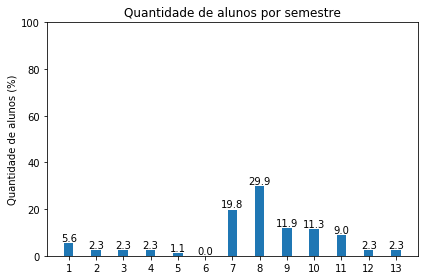

In [33]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [34]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [35]:
aux

{'APROVADO': 0.8248587570621468,
 'REP. FALTA': 0.03389830508474576,
 'TRANCADO': 0.04519774011299435,
 'EXCLUIDA': 0.011299435028248588,
 'REPROVADO': 0.022598870056497175,
 'DISPENSADO': 0.062146892655367235}

### Analisando IHM

In [36]:
codigo = codigos_disciplinas[1]

In [37]:
print(relatorio[1]['nome'])

alunos_nao_rec = relatorio[1]['alunos_nao_rec']

alunos_nao_rec

INTERACAO HOMEMMAQUINA


[10611440,
 10621015,
 10621017,
 10621020,
 10621022,
 10621239,
 10621243,
 10621363,
 10621364,
 10711001,
 10711005,
 10711010,
 10711011,
 10711012,
 10711013,
 10711021,
 10711027,
 10711028,
 10711029,
 10711030,
 10711032,
 10711466,
 10711467,
 10711469,
 10721006,
 10811037,
 10811041,
 10811057,
 10811060,
 10811434,
 10811437,
 10811438,
 10811443,
 10821055,
 10821057,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911036,
 10911040,
 10911042,
 10911044,
 10911054,
 10911068,
 10911075,
 10911649,
 10911653,
 10921054,
 10921059,
 10921064,
 10921069,
 10921071,
 10921072,
 10921073,
 10921363,
 10921373,
 10921378,
 10921379,
 11011050,
 11011057,
 11011065,
 11011073,
 11011087,
 11011089,
 11011827,
 11011829,
 11011830,
 11011835,
 11011836,
 11021057,
 11021059,
 11021060,
 11021061,
 11021063,
 11021067,
 11021068,
 11021069,
 11021445,
 11021452,
 11021593,
 11021633,
 11111309,
 11111314,
 11111316,
 11111322,
 11118146,
 11118199,
 11118202,
 11118203,

In [38]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
11843   10611440             2011.1           1107189  REP. FALTA          0.0
11848   10611440             2011.2           1107189    APROVADO          7.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11999   10621015             2010.1           1107189  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
501   10621017  8.05            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12055   10621017             2009.2           1107189  APROVADO          7.0

     matricula   cra  periodo_ingresso

       matricula  periodo_matricula codigo_componente descricao  media_final
14110   10811057             2010.1           1107189  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
545   10811060  8.56            2008.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
14171   10811060             2010.1           1107189  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
544   10811434  8.75            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14214   10811434             2010.1           1107189  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
542   10811437  8.63            2008.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
14271   10811437             2010.1         

       matricula  periodo_matricula codigo_componente descricao  media_final
16259   11011050             2013.1           1107189  APROVADO          8.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
582   11011057  8.42            2010.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
16369   11011057             2014.1           1107189  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
587   11011065  8.37            2010.1  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16591   11011065             2014.2           1107189  APROVADO          9.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
583   11011073  7.86            2010.1  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16695   11011073             2013.1         

       matricula  periodo_matricula codigo_componente descricao  media_final
19331   11118209             2014.2           1107189  APROVADO          9.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
642   11121191  5.98            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19399   11121191             2015.2           1107189  APROVADO          8.5

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
643   11121212  7.5            2011.2  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente    descricao  \
19483   11121212             2016.1           1107189     APROVADO   
19484   11121212             2016.1           1107189  DESISTENCIA   

       media_final  
19483          7.5  
19484          NaN  

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
635   11121216  6.48            2011.2  CONCLUÍDO             2017.1
   

       matricula  periodo_matricula codigo_componente descricao  media_final
21973   11228207             2014.2           1107189  APROVADO          7.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
675   11311009  7.94            2013.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
22126   11311009             2016.1           1107189  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
672   11311014  7.57            2013.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22197   11311014             2016.2           1107189  TRANCADO          NaN
22202   11311014             2017.1           1107189  APROVADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
677   11311469  8.82            2013.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_c

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
669   11228204  5.73            2012.2  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
21892   11228204             2012.2           1107189  DISPENSADO          8.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
687   11403755  7.46            2014.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
22976   11403755             2014.1           1107189  DISPENSADO          8.1

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
683   11403784  7.3            2014.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
23078   11403784             2014.1           1107189  DISPENSADO          8.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
685   11409514  7.74            2014.1  CO

In [39]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [40]:
aux

[0.09815950920245399,
 0.018404907975460124,
 0.012269938650306749,
 0.0736196319018405,
 0.26993865030674846,
 0.0,
 0.2392638036809816,
 0.1411042944785276,
 0.06748466257668712,
 0.049079754601226995,
 0.018404907975460124,
 0.012269938650306749]

In [41]:
sum(aux)

1.0

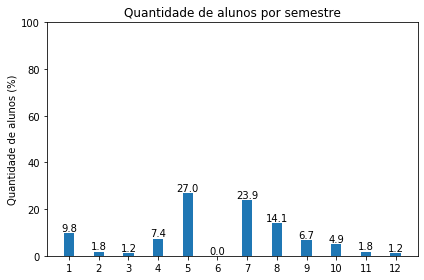

In [42]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [43]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [44]:
aux

{'REP. FALTA': 0.012269938650306749,
 'APROVADO': 0.8159509202453987,
 'TRANCADO': 0.03067484662576687,
 'REPROVADO': 0.006134969325153374,
 'DESISTENCIA': 0.006134969325153374,
 'DISPENSADO': 0.12269938650306748,
 'EXCLUIDA': 0.006134969325153374}

### Analisando IA

In [45]:
codigo = codigos_disciplinas[2]

In [46]:
print(relatorio[2]['nome'])

alunos_nao_rec = relatorio[2]['alunos_nao_rec']

alunos_nao_rec

INTRODUCAO A INTELIGENCIA ARTIFICIAL


[10611004,
 10611008,
 10611011,
 10611015,
 10611021,
 10611026,
 10611028,
 10611029,
 10611434,
 10611437,
 10611439,
 10611440,
 10621014,
 10621015,
 10621017,
 10621020,
 10621239,
 10711001,
 10711005,
 10711021,
 10711032,
 10711466,
 10711467,
 10711469,
 10721006,
 10721015,
 10721026,
 10721244,
 10811031,
 10811041,
 10811057,
 10811434,
 10811443,
 10821055,
 10821057,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911036,
 10911040,
 10911044,
 10911075,
 10921054,
 10921064,
 10921071,
 10921073,
 10921372,
 10921373,
 10921378,
 10921379,
 11011050,
 11011057,
 11011060,
 11011061,
 11011065,
 11011068,
 11011073,
 11011091,
 11011827,
 11011828,
 11011829,
 11011830,
 11011835,
 11011836,
 11021057,
 11021059,
 11021060,
 11021061,
 11021063,
 11021068,
 11021069,
 11021072,
 11021432,
 11021439,
 11021445,
 11021452,
 11021593,
 11021633,
 11021635,
 11021645,
 11111285,
 11111298,
 11111299,
 11111303,
 11111309,
 11111314,
 11111316,
 11111322,
 11118146,

In [47]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
500   10611004  8.57            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
10953   10611004             2009.1           1107191  APROVADO         8.53

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
484   10611008  8.82            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11004   10611008             2009.1           1107191  APROVADO         9.53

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
486   10611011  8.77            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11045   10611011             2008.2           1107191  TRANCADO          NaN
11054   10611011             2009.1           1107191  APROVADO         8.75

     matricula   cra  periodo_ingresso  desc

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
546   10811443  8.51            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14383   10811443             2011.1           1107191  APROVADO         7.82

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
552   10821055  7.68            2008.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
14433   10821055             2011.2           1107191  APROVADO          7.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
547   10821057  8.04            2008.2  CONCLUÍDO             2012.2
       matricula  periodo_matricula codigo_componente descricao  media_final
14493   10821057             2011.2           1107191  APROVADO          8.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
551   10821060  8.03            2008.2  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
588   11011830  8.14            2010.1  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
17090   11011830             2013.2           1107191  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
584   11011835  7.14            2010.1  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
17198   11011835             2013.1           1107191  APROVADO          6.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
585   11011836  7.35            2010.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17247   11011836             2013.1           1107191  APROVADO          8.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
610   11021057  6.83            2010.2  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
19321   11118209             2014.1           1107191  APROVADO          7.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
642   11121191  5.98            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
19374   11121191             2013.2           1107191  REP. FALTA          0.0
19398   11121191             2015.2           1107191    APROVADO          6.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
635   11121216  6.48            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19537   11121216             2015.1           1107191  APROVADO          7.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
645   11121217  6.87            2011.2  CONCLUÍDO             2017.2
       matricula  periodo_matricula co

       matricula  periodo_matricula codigo_componente descricao  media_final
21577   11218799             2015.1           1107191  APROVADO          7.7

     matricula  cra  periodo_ingresso         descricao  periodo_conclusao
666   11221998  5.1            2012.2  ATIVO - FORMANDO             2018.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21844   11221998             2016.2           1107191  APROVADO          6.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
669   11228204  5.73            2012.2  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
21925   11228204             2013.2           1107191  APROVADO          6.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
667   11228207  6.58            2012.2  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
21996   11228207             201

       matricula  periodo_matricula codigo_componente   descricao  media_final
15069   10911054             2014.2           1107191  DISPENSADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
559   10911646  7.64            2009.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
15223   10911646             2010.2           1107191  DISPENSADO          8.1

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
627   11118202  7.5            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
19058   11118202             2015.1           1107191  DISPENSADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
620   11118203  7.95            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
19115   11118203             201

In [48]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [49]:
aux

[0.06329113924050633,
 0.05063291139240506,
 0.006329113924050633,
 0.056962025316455694,
 0.11392405063291139,
 0.0,
 0.3227848101265823,
 0.21518987341772153,
 0.08227848101265822,
 0.05063291139240506,
 0.02531645569620253,
 0.006329113924050633,
 0.006329113924050633]

In [50]:
sum(aux)

1.0

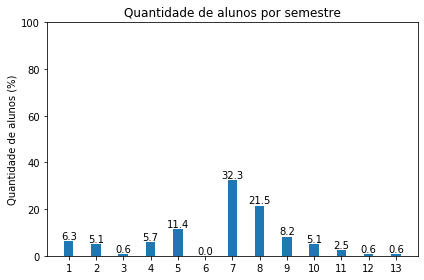

In [51]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [52]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [53]:
aux

{'APROVADO': 0.8291139240506329,
 'TRANCADO': 0.0379746835443038,
 'REP. FALTA': 0.0189873417721519,
 'EXCLUIDA': 0.012658227848101266,
 'INDEFERIDO': 0.0189873417721519,
 'DISPENSADO': 0.08227848101265822}

### Analisando MPS

In [54]:
codigo = codigos_disciplinas[3]

In [55]:
print(relatorio[3]['nome'])

alunos_nao_rec = relatorio[3]['alunos_nao_rec']

alunos_nao_rec

METODOS DE PROJETO DE SOFTWARE


[10611015,
 10611440,
 10621015,
 10621020,
 10621363,
 10621364,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711029,
 10711032,
 10711466,
 10711467,
 10711469,
 10721006,
 10721015,
 10721244,
 10811041,
 10811057,
 10811434,
 10811443,
 10821055,
 10821063,
 10911036,
 10911040,
 10911042,
 10911044,
 10911054,
 10911068,
 10911075,
 10911646,
 10911649,
 10911653,
 10921072,
 10921372,
 11011050,
 11011053,
 11011057,
 11011060,
 11011062,
 11011065,
 11011068,
 11011073,
 11011089,
 11011091,
 11011827,
 11011828,
 11011829,
 11011830,
 11011833,
 11011836,
 11021057,
 11021059,
 11021067,
 11021068,
 11021445,
 11021593,
 11021645,
 11111285,
 11111298,
 11111303,
 11111309,
 11111314,
 11111316,
 11111321,
 11111322,
 11118146,
 11118199,
 11118202,
 11118203,
 11118204,
 11118207,
 11118209,
 11121191,
 11121216,
 11121217,
 11121218,
 11121219,
 11121220,
 11121223,
 11121694,
 11121705,
 11121911,
 11121912,
 11121914,
 11128089,
 11211413,
 11211414,
 11211425,

In [56]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11195   10611015             2009.1           1107202  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11819   10611440             2009.2           1107202  APROVADO          5.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11995   10621015             2009.2           1107202  APROVADO          7.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
513   10621020  6.49            2006.2  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
576   10921372  8.01            2009.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16025   10921372             2013.1           1107202  APROVADO          9.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
593   11011050  9.19            2010.1  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
16247   11011050             2012.1           1107202  APROVADO          9.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
579   11011053  8.67            2010.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
16311   11011053             2013.1           1107202  APROVADO          9.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
582   11011057  8.42            2010.1  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
615   11111321  8.92            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
18734   11111321             2014.1           1107202  APROVADO          9.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
625   11111322  4.77            2011.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
18789   11111322             2013.1           1107202  APROVADO          7.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
624   11118146  8.1            2011.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
18890   11118146             2016.1           1107202  APROVADO          9.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
623   11118199  4.76            2011.1  CONCLUÍDO     

       matricula  periodo_matricula codigo_componente descricao  media_final
21191   11218640             2015.1           1107202  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
658   11218649  6.26            2012.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21333   11218649             2015.2           1107202  APROVADO          8.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
656   11218797  6.82            2012.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
21508   11218797             2015.1           1107202  APROVADO          9.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
668   11221240  7.33            2012.2  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
21652   11221240             2015.2         

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
616   11111299  8.4            2011.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
18415   11111299             2011.1           1107202  DISPENSADO          8.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
662   11211054  7.39            2012.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20471   11211054             2012.1           1107202  DISPENSADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
653   11211416  8.29            2012.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20723   11211416             2015.2           1107202  DISPENSADO          8.1
20727   11211416             2015.2           1107202    EXCLUIDA          NaN

     matricula   cra  periodo_in

In [57]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [58]:
aux

[0.0962962962962963,
 0.05185185185185185,
 0.014814814814814815,
 0.014814814814814815,
 0.0962962962962963,
 0.0,
 0.4148148148148148,
 0.14074074074074075,
 0.08148148148148149,
 0.06666666666666667,
 0.022222222222222223]

In [59]:
sum(aux)

1.0

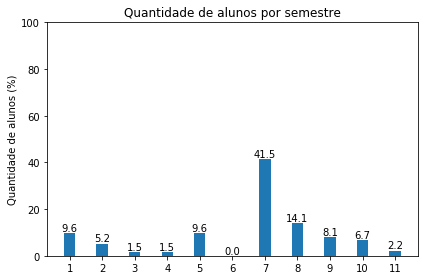

In [60]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [61]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [62]:
aux

{'APROVADO': 0.837037037037037,
 'TRANCADO': 0.02962962962962963,
 'REPROVADO': 0.022222222222222223,
 'EXCLUIDA': 0.014814814814814815,
 'DISPENSADO': 0.0962962962962963}

### Analisando REDES

In [63]:
codigo = codigos_disciplinas[4]

In [64]:
print(relatorio[4]['nome'])

alunos_nao_rec = relatorio[4]['alunos_nao_rec']

alunos_nao_rec

REDES DE COMPUTADORES I


[10611440,
 10621017,
 10621020,
 10621239,
 10621243,
 10621363,
 10621364,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711029,
 10711032,
 10711466,
 10711469,
 10721006,
 10721015,
 10721022,
 10721244,
 10811041,
 10811057,
 10811434,
 10811443,
 10821055,
 10821057,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911036,
 10911040,
 10911068,
 10911075,
 10911646,
 10911649,
 10911653,
 10921059,
 10921063,
 10921069,
 10921072,
 10921360,
 10921363,
 10921372,
 10921378,
 11011050,
 11011057,
 11011060,
 11011062,
 11011065,
 11011068,
 11011073,
 11011089,
 11011091,
 11011828,
 11011829,
 11011830,
 11011833,
 11011835,
 11021057,
 11021059,
 11021060,
 11021061,
 11021063,
 11021067,
 11021068,
 11021069,
 11021072,
 11021432,
 11021439,
 11021445,
 11021452,
 11021593,
 11021633,
 11021635,
 11021645,
 11111298,
 11111303,
 11111309,
 11111314,
 11111316,
 11111321,
 11111322,
 11118146,
 11118199,
 11118204,
 11118207,
 11118209,
 11121191,
 11121212,

In [65]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11830   10611440             2010.1           1107207  APROVADO          6.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
501   10621017  8.05            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12053   10621017             2009.2           1107207  APROVADO          6.2

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
513   10621020  6.49            2006.2  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
12157   10621020             2009.2           1107207  APROVADO          6.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
514   10621239  7.38            2006.2  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
14846   10911036             2012.1           1107207  APROVADO          9.6

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
554   10911040  8.99            2009.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14895   10911040             2012.1           1107207  APROVADO          8.8

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
558   10911068  7.9            2009.1  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15115   10911068             2012.1           1107207  APROVADO          7.5

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
562   10911075  8.7            2009.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
15178   10911075             2012.1           11

       matricula  periodo_matricula codigo_componente descricao  media_final
17435   11021060             2014.1           1107207  APROVADO          6.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
604   11021061  9.03            2010.2  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17485   11021061             2013.2           1107207  APROVADO          8.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
614   11021063  7.95            2010.2  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
17539   11021063             2013.2           1107207  APROVADO          7.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
613   11021067  7.93            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17604   11021067             2014.2         

       matricula  periodo_matricula codigo_componente descricao  media_final
19823   11121220             2014.2           1107207  APROVADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
631   11121223  6.62            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19899   11121223             2016.1           1107207  APROVADO          8.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
644   11121694  6.43            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19982   11121694             2016.1           1107207  APROVADO          7.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
637   11121697  7.47            2011.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
20033   11121697             2014.2         

       matricula  periodo_matricula codigo_componente descricao  media_final
22288   11311018             2016.4           1107207  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
677   11311469  8.82            2013.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22348   11311469             2017.1           1107207  APROVADO          9.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
670   11311862  8.11            2013.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
22400   11311862             2016.2           1107207  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
678   11318705  7.79            2013.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
22461   11318705             2015.2         

       matricula  periodo_matricula codigo_componente   descricao  media_final
18447   11111299             2011.2           1107207  DISPENSADO          8.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
627   11118202  7.5            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
19051   11118202             2015.1           1107207  DISPENSADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
620   11118203  7.95            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
19112   11118203             2015.1           1107207  DISPENSADO          7.5

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
664   11221262  7.9            2012.2  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente   descricao  media_final
21672   11221262             2012.

In [66]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [67]:
aux

[0.060240963855421686,
 0.030120481927710843,
 0.018072289156626505,
 0.018072289156626505,
 0.030120481927710843,
 0.0,
 0.3132530120481928,
 0.18674698795180722,
 0.18072289156626506,
 0.0963855421686747,
 0.04819277108433735,
 0.012048192771084338,
 0.006024096385542169]

In [68]:
sum(aux)

1.0

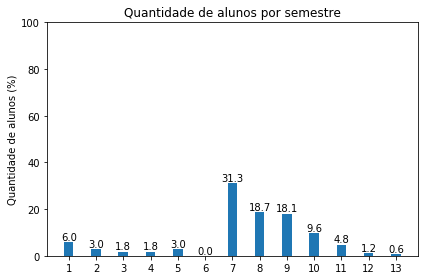

In [69]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [70]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [71]:
aux

{'APROVADO': 0.8373493975903614,
 'REP. FALTA': 0.006024096385542169,
 'REPROVADO': 0.006024096385542169,
 'TRANCADO': 0.03614457831325301,
 'EXCLUIDA': 0.012048192771084338,
 'DISPENSADO': 0.10240963855421686}

### Analisando ADM SI

In [72]:
codigo = codigos_disciplinas[5]

In [73]:
print(relatorio[5]['nome'])

alunos_nao_rec = relatorio[5]['alunos_nao_rec']

alunos_nao_rec

ADM SIST DE INFORMACOES


[10611014,
 10611015,
 10611440,
 10621015,
 10621017,
 10621018,
 10621020,
 10621022,
 10621030,
 10621239,
 10621243,
 10621363,
 10621364,
 10621367,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711028,
 10711032,
 10711466,
 10711467,
 10711469,
 10721006,
 10721015,
 10721022,
 10721026,
 10811031,
 10811041,
 10811057,
 10811434,
 10811443,
 10821063,
 10821251,
 10821361,
 10911036,
 10911040,
 10911042,
 10911075,
 10911646,
 10911649,
 10911653,
 10921054,
 10921059,
 10921063,
 10921064,
 10921069,
 10921072,
 10921073,
 10921360,
 10921372,
 10921378,
 11011050,
 11011053,
 11011057,
 11011060,
 11011061,
 11011062,
 11011065,
 11011068,
 11011073,
 11011087,
 11011089,
 11011091,
 11011827,
 11011828,
 11011829,
 11011830,
 11011833,
 11011835,
 11011836,
 11021057,
 11021059,
 11021067,
 11021068,
 11021069,
 11021439,
 11021445,
 11021593,
 11021633,
 11021645,
 11111285,
 11111298,
 11111299,
 11111309,
 11111322,
 11118146,
 11118202,
 11118203,
 11118209,

In [74]:
for aluno in alunos_nao_rec:
    print(discentes_depois[discentes_depois['matricula'] == aluno])
    aux = matriculas_geral[matriculas_geral['matricula'] == aluno]
    aux = aux[aux['codigo_componente'] == codigo]
    print(aux)
    
    print()

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
497   10611014  8.67            2006.1  CONCLUÍDO             2009.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11162   10611014             2009.1           1204112  APROVADO          8.1

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11213   10611015             2010.1           1204112  APROVADO          8.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
495   10611440  6.43            2006.1  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11815   10611440             2009.1           1204112  APROVADO          5.9

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
511   10621015  6.77            2006.2  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
14069   10811041             2011.1           1204112  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
538   10811057  8.75            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14123   10811057             2011.1           1204112  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
544   10811434  8.75            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14230   10811434             2011.1           1204112  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
546   10811443  8.51            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14379   10811443             2011.1         

       matricula  periodo_matricula codigo_componente descricao  media_final
16477   11011061             2014.2           1204112  APROVADO          8.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
596   11011062  8.49            2010.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
16518   11011062             2013.1           1204112  APROVADO          8.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
587   11011065  8.37            2010.1  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16577   11011065             2013.2           1204112  APROVADO          9.1

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
589   11011068  7.5            2010.1  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
16635   11011068             2013.1           

       matricula  periodo_matricula codigo_componente descricao  media_final
18763   11111322             2011.1           1204112  APROVADO          7.7

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
624   11118146  8.1            2011.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
18892   11118146             2016.1           1204112  APROVADO          9.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
627   11118202  7.5            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
19046   11118202             2013.2           1204112  REP. FALTA          0.0
19053   11118202             2015.1           1204112    APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
620   11118203  7.95            2011.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
680   11328180  7.75            2013.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
22689   11328180             2014.1           1204112  APROVADO          7.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
682   11328275  7.92            2013.2  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22761   11328275             2017.1           1204112  APROVADO          7.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
681   11328386  7.36            2013.2  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22815   11328386             2016.2           1204112  APROVADO          7.8

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
692   11427671  8.78            2014.2  CONCLUÍDO   

In [75]:
aux = util_extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [76]:
aux

[0.11428571428571428,
 0.05,
 0.014285714285714285,
 0.06428571428571428,
 0.1357142857142857,
 0.0,
 0.3142857142857143,
 0.17857142857142858,
 0.07142857142857142,
 0.04285714285714286,
 0.014285714285714285]

In [77]:
sum(aux)

0.9999999999999999

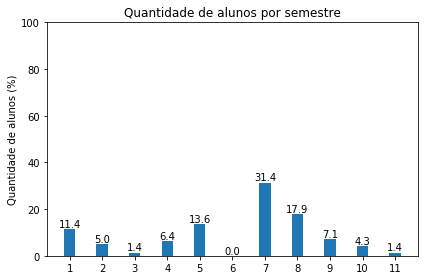

In [78]:
util_gerador_graficos.plot_ditribuicao_alunos(aux)

In [79]:
aux = util_extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [80]:
aux

{'APROVADO': 0.8642857142857143,
 'REP. FALTA': 0.02142857142857143,
 'REPROVADO': 0.007142857142857143,
 'TRANCADO': 0.014285714285714285,
 'EXCLUIDA': 0.007142857142857143,
 'INDEFERIDO': 0.007142857142857143,
 'DISPENSADO': 0.07857142857142857}

In [81]:
sum(aux.values())

1.0